In [8]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [9]:
countV = CountVectorizer()


In [12]:
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(dt['Statement'],dt['Label'])
predicted_nb = nb_pipeline.predict(dtTest['Statement'])
np.mean(predicted_nb == dtTest['Label'])


0.619140625

In [23]:
nb_predicted=pd.DataFrame(predicted_nb)

In [25]:
nb_predicted

,0
0,True
1,True
2,True
3,False
4,True
5,True
6,False
7,True
8,True
9,True


In [30]:
pd.DataFrame(predicted_rf).to_csv('rf_predicted.csv')

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


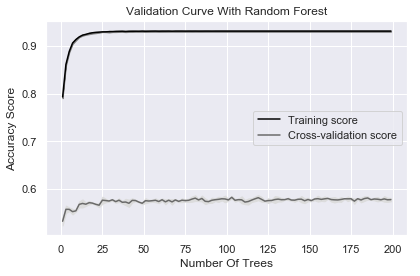

In [46]:
param_range = np.arange(1, 200, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train_count_pd, 
                                             y_Train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [15]:
from sklearn.metrics import classification_report
#from sklearn.metrics import f1_score
print(classification_report(dtTest['Label'],predicted_nb))


              precision    recall  f1-score   support

       False       0.57      0.48      0.52       661
        True       0.65      0.72      0.68       875

   micro avg       0.62      0.62      0.62      1536
   macro avg       0.61      0.60      0.60      1536
weighted avg       0.61      0.62      0.61      1536



In [16]:
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=-1))
        ])
    
random_forest.fit(dt['Statement'],dt['Label'])
predicted_rf = random_forest.predict(dtTest['Statement'])
np.mean(predicted_rf == dtTest['Label'])



0.6341145833333334

In [17]:
print(classification_report(dtTest['Label'],predicted_rf))


              precision    recall  f1-score   support

       False       0.60      0.43      0.50       661
        True       0.65      0.79      0.71       875

   micro avg       0.63      0.63      0.63      1536
   macro avg       0.63      0.61      0.61      1536
weighted avg       0.63      0.63      0.62      1536



In [18]:
print(confusion_matrix(dtTest['Label'],predicted_rf))

[[278 383]
 [185 690]]


In [68]:
infom=classification_report(dtTest['Label'],predicted_rf).split()
[float(infom[6])]+[float(infom[11])]

[0.42, '0.79']

In [40]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,1),use_idf=True,smooth_idf=True)


In [41]:
##Now using n-grams
#naive-bayes classifier # 14ngram
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(dt['Statement'],dt['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(dtTest['Statement'])
np.mean(predicted_nb_ngram == dtTest['Label'])


0.6158854166666666

In [42]:
print(classification_report(dtTest['Label'],predicted_nb_ngram))


              precision    recall  f1-score   support

       False       0.62      0.29      0.39       661
        True       0.62      0.87      0.72       875

   micro avg       0.62      0.62      0.62      1536
   macro avg       0.62      0.58      0.56      1536
weighted avg       0.62      0.62      0.58      1536



In [43]:
#random forest classifier ## 11ngram
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest_ngram.fit(dt['Statement'],dt['Label'])
predicted_rf_ngram = random_forest_ngram.predict(dtTest['Statement'])
np.mean(predicted_rf_ngram == dtTest['Label'])


0.6282552083333334

In [44]:
print(classification_report(dtTest['Label'],predicted_rf_ngram))

              precision    recall  f1-score   support

       False       0.60      0.42      0.49       661
        True       0.64      0.79      0.71       875

   micro avg       0.63      0.63      0.63      1536
   macro avg       0.62      0.60      0.60      1536
weighted avg       0.62      0.63      0.61      1536



In [45]:
random_forest_ngram.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('rf_tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])>

## grid search

In [11]:
#grid-search parameter optimization
#random forest classifier
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4)],
               'rf_tfidf__use_idf': (True, False),
               #'rf_clf__max_depth': (7,9,10,11,13,14,15,18,20,22,25),
               'rf_clf__n_estimators': (20,50,100,200,300)
}

gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(dt['Statement'],dt['Label'])

gs_clf.best_score_
gs_clf.best_params_


/Users/erik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'rf_clf__n_estimators': 100,
 'rf_tfidf__ngram_range': (1, 1),
 'rf_tfidf__use_idf': False}

In [12]:
k=gs_clf.predict(dtTest['Statement'])

In [14]:
np.mean(k==dtTest['Label'])

0.609375

In [6]:
#grid-search parameter optimization
#random forest classifier
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=-1))
        ])
    
#random forest classifier parameters
parameters = {
               'rf_clf__min_samples_leaf':(1,2,4,6),
               'rf_clf__min_impurity_split ':(1e-7,1e-5,1e-3,1e-1)
}

gs_clf_count = GridSearchCV(random_forest, parameters, n_jobs=-1)
gs_clf_count = gs_clf.fit(dt['Statement'],dt['Label'])

print(gs_clf_count.best_score_)
print(gs_clf_count.best_params_)


NameError: name 'countV' is not defined

In [20]:
#grid-search parameter optimization
#random forest classifier
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=-1))
        ])
    
#random forest classifier parameters
parameters = {
               'rf_clf__n_estimators': (200,300)                }

gs_clf_count = GridSearchCV(random_forest, parameters, n_jobs=-1)
gs_clf_count = gs_clf_count.fit(dt['Statement'],dt['Label'])
gs_clf_count.best_params_

/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'rf_clf__n_estimators': 300}

In [80]:
predcted_cls=gs_clf_count.predict(dtTest['Statement'])
np.mean(predcted_cls==dtTest['Label'])

0.6204427083333334

In [82]:
gs_clf_count.score(dtTest['Statement'],dtTest['Label'])

0.6204427083333334

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predcted_cls,dtTest['Label'])

array([[273, 195],
       [388, 680]])

In [85]:
print ("Accuracy on training:",np.mean(predcted_cls==dtTest['Label']),"testing")


Accuracy on training: 0.6204427083333334 testing


# 1 Clustering
## 1.1 based on dt

In [46]:

dt.head()

,Statement,Label,word_count,char_count,avg_word,stopwords,numerics
7490,says us national debt tripled rep greg waldens...,True,14,82,4.928571,4,0
2556,says scott walker cut taxes wealthiest raised ...,True,15,94,5.333333,4,0
7514,says cannot implement paul ryans plan without ...,True,14,88,5.357143,4,0
1363,pat mccrory north carolina fallen 41st teacher...,False,12,70,4.916667,3,0
1847,says mitt romney arizona said believes states ...,False,26,150,4.807692,11,1


In [47]:
dt['Label'][dt['Label']==True]=1
dt.head()

/Users/erik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/erik/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/erik/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_globa

,Statement,Label,word_count,char_count,avg_word,stopwords,numerics
7490,says us national debt tripled rep greg waldens...,1.0,14,82,4.928571,4,0
2556,says scott walker cut taxes wealthiest raised ...,1.0,15,94,5.333333,4,0
7514,says cannot implement paul ryans plan without ...,1.0,14,88,5.357143,4,0
1363,pat mccrory north carolina fallen 41st teacher...,0.0,12,70,4.916667,3,0
1847,says mitt romney arizona said believes states ...,0.0,26,150,4.807692,11,1


In [48]:
from sklearn.model_selection import train_test_split
y=dt['Label']
data=dt.drop(['Label','Statement'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=8017)
X_train.head()

,word_count,char_count,avg_word,stopwords,numerics
9239,29,167,4.793103,7,3
4793,25,145,4.840000,8,1
838,28,167,5.000000,10,0
948,9,49,4.555556,2,0
4155,9,67,6.555556,2,0


In [43]:
#grid-search parameter optimization
#random forest classifier

clf=RandomForestClassifier(n_estimators=200,max_samples_leaf=2)
dt_clf=clf.fit(X_train,y_train)
dt_clf.score(X_train,y_train)


TypeError: __init__() got an unexpected keyword argument 'max_samples_leaf'

In [42]:
dt_clf.score(X_test,y_test)


0.5315729047072331

In [ ]:
predcted_cls=gs_clf_dt.predict(X_test)
np.mean(predcted_cls==y_test)

## 1.2 dt and clf

## 1.3 based on countV

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
countV = CountVectorizer(stop_words='english',max_features=200)
X_train_count=countV.fit_transform(xTrain)
X_train_count_pd=pd.DataFrame(X_train_count.toarray(), columns=[countV.get_feature_names()])

X_train_count_pd.head()

,000,10,100,12,15,20,25,30,40,50,...,weve,white,wisconsin,women,work,workers,working,world,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
## tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
countV = TfidfVectorizer(stop_words='english',max_features=200,ngram_range=(1,2),use_idf=True,smooth_idf=True)
X_train_count=countV.fit_transform(xTrain)
X_train_count_pd=pd.DataFrame(X_train_count.toarray(), columns=[countV.get_feature_names()])
X_train_count_pd.head()

,000,10,100,12,15,20,25,30,40,50,...,weve,white,wisconsin,women,work,workers,working,world,year,years
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.23347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.289635,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_test_count=countV.transform(xTest)
X_test_count_pd=pd.DataFrame(X_test_count.toarray(), columns=[countV.get_feature_names()])
X_test_count_pd.head()

,000,10,100,12,15,20,25,30,40,50,...,weve,white,wisconsin,women,work,workers,working,world,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.cluster import KMeans
kmean1 = KMeans(n_clusters=4, init='random', random_state=42)
kmean1.fit(X_train_count_pd)

KeyboardInterrupt: 

In [45]:
y_Train=pd.DataFrame(list(yTrain),columns=['label'])
y_Test=pd.DataFrame(list(yTest),columns=['label'])
y_Train.head()
#7490,2556,7514,  1363,1847

,label
0,True
1,True
2,True
3,False
4,False


In [69]:
X_train_count_pd.head()

,america,american,americans,average,barack,billion,budget,care,clinton,country,...,states,tax,taxes,texas,time,united,voted,wisconsin,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
X_test_count_pd.head()

,america,american,americans,average,barack,billion,budget,care,clinton,country,...,states,tax,taxes,texas,time,united,voted,wisconsin,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.15, random_state=8017)
clf=RandomForestClassifier(n_estimators=300) # max nodes nomore than 3
dt_clf=clf.fit(X_train,y_train)
dt_clf.score(X_train,y_train)

NameError: name 'X1' is not defined

In [125]:
dt_clf.score(X_test,y_test)

0.5552407932011332

In [131]:
list(confusion_matrix(clf.predict(X_train),y_train))

[array([412,  87]), array([277, 632])]

In [73]:
def clusterclf(Xtrain,Ytrain,Xtest,Ytest,k):
    from sklearn.cluster import KMeans
    kmean_c = KMeans(n_clusters=k, init='random', random_state=42)
    kmean_c.fit(Xtrain)
    for i in range(k):
        globals()['X_set_'+str(i)]=[]
        globals()['Y_set_'+str(i)]=[]
    for i in range(len(kmean_c.labels_)):
        globals()['X_set_'+str(kmean_c.labels_[i])].append(list(Xtrain.loc[i]))
        globals()['Y_set_'+str(kmean_c.labels_[i])].append(sum(Ytrain.iloc[i]))


In [79]:
kmean1.predict(X_test_count_pd)

array([3, 3, 3, ..., 0, 0, 3], dtype=int32)

In [63]:
kmean1.labels_


array([3, 3, 3, ..., 2, 2, 3], dtype=int32)

In [45]:
clusterclf(X_train_count_pd,y_Train,xTest,yTest,4)

In [63]:
y_train

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

X2 0.68 ,x3 0.61

## 1.4 based on tf-idf

## packaged:

In [177]:
from sklearn.pipeline import Pipeline
random_forest = Pipeline([
        ('rf_clf',RandomForestClassifier(n_jobs=-1))
        ])

parameters = {
               'rf_clf__n_estimators':(200,300),
               'rf_clf__max_leaf_nodes':(2,3),
    'rf_clf__min_impurity_split':(1e-7,1e-5), #1e-7,1e-5,
                'rf_clf__min_samples_split':(2,5,10,15)
}

clf = GridSearchCV(random_forest, parameters, n_jobs=-1)

train_s=[];train_t=[]
test_s=[];test_t=[]

def clusterclf(Xtrain,Ytrain,Xtest,Ytest,k):
    from sklearn.cluster import KMeans
    import numpy as np
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    kmean_c = KMeans(n_clusters=k, init='random', random_state=42)
    kmean_c.fit(Xtrain)
    for i in range(k):
        globals()['X_set_'+str(i)]=[]
        globals()['Y_set_'+str(i)]=[]
        globals()['X_test_'+str(i)]=[]
        globals()['Y_test_'+str(i)]=[]
    for i in range(len(kmean_c.labels_)):
        globals()['X_set_'+str(kmean_c.labels_[i])].append(list(Xtrain.loc[i]))
        globals()['Y_set_'+str(kmean_c.labels_[i])].append(sum(Ytrain.iloc[i]))
    test_cluster=list(kmean_c.predict(Xtest))
    for i in range(len(test_cluster)):
        globals()['X_test_'+str(test_cluster[i])].append(list(Xtest.loc[i]))
        globals()['Y_test_'+str(test_cluster[i])].append(sum(Ytest.iloc[i]))
    # training models
    train_acc=[]
    test_acc=[]
    train_confusion=[]
    test_confusion=[]
    for i in range(k):
        clf_model=clf.fit(globals()['X_set_'+str(i)],globals()['Y_set_'+str(i)])
        print(clf_model.best_params_)
        predict_train=clf_model.predict(globals()['X_set_'+str(i)])
        train_s.extend(predict_train),train_t.extend(globals()['Y_set_'+str(i)])
        train_acc.append(np.mean(predict_train==globals()['Y_set_'+str(i)]))
        info=classification_report(globals()['Y_set_'+str(i)],predict_train).split()
        train_confusion.append([float(info[6])]+[float(info[11])])
        predict_test=clf_model.predict(globals()['X_test_'+str(i)])
        test_s.extend(predict_test),test_t.extend(globals()['Y_test_'+str(i)])
        test_acc.append(np.mean(predict_test==globals()['Y_test_'+str(i)]))
        info=classification_report(globals()['Y_test_'+str(i)],predict_test).split()
        test_confusion.append([float(info[6])]+[float(info[11])])
    print ("Accuracy on training:",train_acc,".\ntesting:",test_acc,".\n")
    print("specificity/sensitivity on training:",train_confusion,".  \ntesting:",test_confusion,".\n")
    print("Over-all accuracy on training:",sum((pd.DataFrame(train_s)==pd.DataFrame(train_t))[0])/len(train_s),". \ntesting:",sum((pd.DataFrame(test_s)==pd.DataFrame(test_t))[0])/len(test_s),".\n")
    print("specificity/sensitivity on training:",classification_report(train_t,train_s).split()[6],classification_report(train_t,train_s).split()[11],".\ntesting:",classification_report(test_t,test_s).split()[6],classification_report(test_t,test_s).split()[11],".\n")


In [183]:
print(classification_report(train_t,train_s))


              precision    recall  f1-score   support

           0       0.63      0.19      0.29      3827
           1       0.59      0.91      0.72      4877

   micro avg       0.59      0.59      0.59      8704
   macro avg       0.61      0.55      0.50      8704
weighted avg       0.61      0.59      0.53      8704



In [185]:
0.29

0.59

In [101]:
len(train_s)

8704

In [30]:
dt_clf.score(X_test,y_test)

0.46153846153846156

In [181]:
pd.DataFrame(X_set_0)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.525938,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.264851
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [178]:
clusterclf(X_train_count_pd,y_Train,X_test_count_pd,y_Test,5)

/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: Th

{'rf_clf__max_leaf_nodes': 3, 'rf_clf__min_impurity_split': 1e-07, 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 200}


/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in ve

/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:28

{'rf_clf__max_leaf_nodes': 3, 'rf_clf__min_impurity_split': 1e-07, 'rf_clf__min_samples_split': 10, 'rf_clf__n_estimators': 200}


/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: Th

/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:28

{'rf_clf__max_leaf_nodes': 3, 'rf_clf__min_impurity_split': 1e-05, 'rf_clf__min_samples_split': 10, 'rf_clf__n_estimators': 200}


/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: Th

{'rf_clf__max_leaf_nodes': 3, 'rf_clf__min_impurity_split': 1e-07, 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 200}


/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: Th

{'rf_clf__max_leaf_nodes': 2, 'rf_clf__min_impurity_split': 1e-07, 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.5709156193895871, 0.5822692448011675, 0.6487695749440716, 0.5703753351206434, 0.7121212121212122] .
testing: [0.5428571428571428, 0.5824524312896406, 0.65625, 0.5664335664335665, 0.674074074074074] .

specificity/sensitivity on training: [[1.0, 0.01], [0.03, 0.99], [0.91, 0.37], [0.17, 0.95], [0.0, 1.0]] .  
testing: [[1.0, 0.0], [0.02, 0.98], [0.82, 0.47], [0.13, 0.95], [0.0, 1.0]] .

Over-all accuracy on training: 0.59375 . 
testing: 0.587890625 .

specificity/sensitivity on training: 0.19 0.91 .
testing: 0.16 0.91 .



/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/erik/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pre

 # result on count
 5
 'rf_clf__n_estimators':(200,300),
'rf_clf__min_impurity_split':(1e-7,1e-5,1e-3,1e-1)
Accuracy on training: [0.830869308101715, 0.950354609929078, 0.9179487179487179, 0.8017953321364453, 0.8942528735632184] .
testing: [0.551829268292683, 0.5735294117647058, 0.5535714285714286, 0.5732349841938883, 0.5063291139240507] .

specificity/sensitivity on training: [[0.9, 0.77], [0.98, 0.92], [0.84, 0.97], [0.66, 0.9], [0.93, 0.86]] .  
testing: [[0.7, 0.43], [0.62, 0.52], [0.32, 0.69], [0.38, 0.72], [0.38, 0.56]] .

Over-all accuracy on training: 0.8270909926470589 . 
testing: 0.5638020833333334 .

specificity/sensitivity on training: 0.76 0.88 .
testing: 0.46 0.64 .


## 50 max
{'rf_clf__min_impurity_split': 1e-07, 'rf_clf__n_estimators': 300}
Accuracy on training: [0.7332939089296274, 0.8723404255319149, 0.8532423208191127, 0.6971274685816876, 0.804147465437788] .
testing: [0.5914634146341463, 0.4411764705882353, 0.6071428571428571, 0.5827186512118019, 0.5949367088607594] .

specificity/sensitivity on training: [[0.58, 0.87], [0.94, 0.8], [0.68, 0.96], [0.38, 0.93], [0.82, 0.79]] .  
testing: [[0.49, 0.68], [0.49, 0.39], [0.22, 0.83], [0.25, 0.84], [0.5, 0.64]] .

Over-all accuracy on training: 0.728515625 . 
testing: 0.5807291666666666 .

specificity/sensitivity on training: 0.50 0.91 .
testing: 0.32 0.77 .

5
'rf_clf__n_estimators':(200,300),
               #'rf_clf__min_impurity_split':(1e-7,1e-5,1e-3,1e-1) #1e-7,1e-5,
                'rf_clf__max_leaf_nodes':(2,3,4,5,8,10)
{'rf_clf__max_leaf_nodes': 10, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.5972797161442933, 0.7328605200945626, 0.6666666666666666, 0.5982046678635548, 0.6988505747126437] .
testing: [0.6097560975609756, 0.5882352941176471, 0.6339285714285714, 0.5669125395152792, 0.620253164556962] .

specificity/sensitivity on training: [[0.36, 0.82], [0.79, 0.67], [0.2, 0.97], [0.09, 0.97], [0.46, 0.91]] .  
testing: [[0.36, 0.82], [0.7, 0.45], [0.07, 0.96], [0.07, 0.94], [0.25, 0.78]] .

Over-all accuracy on training: 0.6142003676470589 . 
testing: 0.5846354166666666 .

specificity/sensitivity on training: 0.22 0.93 .
testing: 0.18 0.89 .


# set max features:100->50
Accuracy on training: [0.5872264931992903, 0.7044917257683215, 0.6808873720136519, 0.5908438061041292, 0.6474654377880185] .
testing: [0.5884146341463414, 0.6470588235294118, 0.6339285714285714, 0.5690200210748156, 0.7468354430379747] .

specificity/sensitivity on training: [[0.34, 0.82], [0.78, 0.63], [0.28, 0.94], [0.08, 0.97], [0.34, 0.91]] .  
testing: [[0.36, 0.79], [0.62, 0.68], [0.12, 0.93], [0.06, 0.95], [0.33, 0.93]] .

Over-all accuracy on training: 0.6045496323529411 . 
testing: 0.5904947916666666 .

specificity/sensitivity on training: 0.20 0.92 .
testing: 0.17 0.91 .


## RESULT ON TFIDF
 5
 'rf_clf__n_estimators':(200,300),
'rf_clf__min_impurity_split':(1e-7,1e-5,1e-3,1e-1)

{'rf_clf__min_impurity_split': 1e-05, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.8697318007662835, 0.839095744680851, 0.66, 0.8424657534246576, 0.705655752057433] .
testing: [0.574468085106383, 0.4796747967479675, 0.6239316239316239, 0.6444444444444445, 0.5737211634904714] .

specificity/sensitivity on training: [[0.81, 0.91], [0.74, 0.91], [0.43, 0.87], [0.53, 0.97], [0.47, 0.9]] .  
testing: [[0.37, 0.71], [0.23, 0.66], [0.43, 0.78], [0.15, 0.91], [0.32, 0.78]] .

Over-all accuracy on training: 0.7277688419117647 . 
testing: 0.5804036458333334 .

specificity/sensitivity on training: 0.50 0.91 .
testing: 0.32 0.78 .

# 100
{'rf_clf__min_impurity_split': 0.001, 'rf_clf__n_estimators': 300}
Accuracy on training: [0.809149040826365, 0.7727272727272727, 0.9102384291725105, 0.8413793103448276, 0.8953229398663697] .
testing: [0.5739700374531835, 0.5643153526970954, 0.6335877862595419, 0.6842105263157895, 0.5194805194805194] .

specificity/sensitivity on training: [[0.7, 0.9], [0.67, 0.87], [0.74, 0.99], [0.94, 0.77], [0.93, 0.86]] .  
testing: [[0.38, 0.73], [0.41, 0.69], [0.16, 0.87], [0.8, 0.56], [0.4, 0.58]] .

Over-all accuracy on training: 0.8169806985294118 . 
testing: 0.576171875 .

specificity/sensitivity on training: 0.71 0.90 .
testing: 0.38 0.72 .

{'rf_clf__max_leaf_nodes': 10, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.6283524904214559, 0.6529255319148937, 0.6064, 0.7136986301369863, 0.5909648047627386] .
testing: [0.5957446808510638, 0.5447154471544715, 0.594017094017094, 0.6518518518518519, 0.5947843530591775] .

specificity/sensitivity on training: [[0.12, 0.99], [0.24, 0.95], [0.31, 0.89], [0.02, 1.0], [0.22, 0.9]] .  
testing: [[0.0, 1.0], [0.08, 0.89], [0.32, 0.82], [0.0, 1.0], [0.22, 0.89]] .

Over-all accuracy on training: 0.6099494485294118 . 
testing: 0.595703125 .

specificity/sensitivity on training: 0.22 0.91 .
testing: 0.20 0.89 .

# 100
{'rf_clf__max_leaf_nodes': 5, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.5945236924085916, 0.6340523882896765, 0.7208976157082749, 0.5724137931034483, 0.6391982182628062] .
testing: [0.5777153558052435, 0.5560165975103735, 0.6564885496183206, 0.47368421052631576, 0.7142857142857143] .

specificity/sensitivity on training: [[0.2, 0.91], [0.4, 0.86], [0.08, 1.0], [0.02, 1.0], [0.25, 0.98]] .  
testing: [[0.17, 0.9], [0.26, 0.79], [0.02, 0.98], [0.0, 1.0], [0.16, 0.98]] .

Over-all accuracy on training: 0.6127068014705882 . 
testing: 0.5865885416666666 .

specificity/sensitivity on training: 0.22 0.92 .
testing: 0.17 0.90 .


## node cluster 8 count
{'rf_clf__max_leaf_nodes': 2, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.6882217090069284, 0.7292993630573248, 0.6813186813186813, 0.7310924369747899, 0.7008928571428571, 0.5992501562174547, 0.6254355400696864, 0.6416464891041163] .
testing: [0.671875, 0.6403508771929824, 0.6197183098591549, 0.6, 0.5263157894736842, 0.5842167255594818, 0.5458715596330275, 0.7213114754098361] .

specificity/sensitivity on training: [[0.87, 0.49], [0.0, 1.0], [0.76, 0.61], [0.58, 0.88], [0.69, 0.71], [0.14, 0.95], [0.37, 0.87], [0.0, 1.0]] .  
testing: [[0.84, 0.44], [0.0, 1.0], [0.74, 0.5], [0.5, 0.66], [0.52, 0.53], [0.1, 0.93], [0.26, 0.78], [0.0, 1.0]] .

Over-all accuracy on training: 0.6324678308823529 . 
testing: 0.5944010416666666 .

specificity/sensitivity on training: 0.30 0.89 .
testing: 0.25 0.85 .

## minimal gini
{'rf_clf__min_impurity_split': 0.1, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.9399538106235565, 0.9028662420382165, 0.8815628815628815, 0.9537815126050421, 0.8794642857142857, 0.782961882941054, 0.7430313588850174, 0.9055690072639225] .
testing: [0.515625, 0.5877192982456141, 0.6056338028169014, 0.56, 0.5, 0.5665488810365136, 0.6100917431192661, 0.6557377049180327] .

specificity/sensitivity on training: [[0.95, 0.93], [0.66, 0.99], [0.91, 0.85], [0.97, 0.93], [0.95, 0.81], [0.63, 0.9], [0.64, 0.84], [0.76, 0.98]] .  
testing: [[0.51, 0.52], [0.1, 0.86], [0.72, 0.49], [0.56, 0.56], [0.67, 0.29], [0.33, 0.74], [0.49, 0.7], [0.18, 0.84]] .

Over-all accuracy on training: 0.81640625 . 
testing: 0.5774739583333334 .

specificity/sensitivity on training: 0.71 0.90 .
testing: 0.40 0.71 .


## tf idf
## node


## minimal gini
{'rf_clf__min_impurity_split': 0.001, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.9507575757575758, 0.944620253164557, 0.9660056657223796, 0.879793675712043, 0.9778434268833087, 0.9795454545454545, 0.8989976869699307, 0.9465408805031447] .
testing: [0.6, 0.6055045871559633, 0.5098039215686274, 0.5877862595419847, 0.6101694915254238, 0.64, 0.563265306122449, 0.5192307692307693] .

specificity/sensitivity on training: [[0.99, 0.9], [0.98, 0.92], [0.97, 0.96], [0.9, 0.86], [0.93, 1.0], [0.98, 0.98], [0.93, 0.87], [0.9, 0.98]] .  
testing: [[0.76, 0.41], [0.4, 0.74], [0.52, 0.5], [0.51, 0.64], [0.08, 0.87], [0.3, 0.79], [0.52, 0.6], [0.32, 0.7]] .

Over-all accuracy on training: 0.9102711397058824 . 
testing: 0.5852864583333334 .

specificity/sensitivity on training: 0.93 0.90 .
testing: 0.49 0.66 .

## all word

Accuracy on training: [0.5973154362416108, 0.5641692681234824, 0.7518796992481203, 0.8120805369127517, 0.6099137931034483] .
testing: [0.6293103448275862, 0.568089430894309, 0.6280487804878049, 0.6129032258064516, 0.6753246753246753] .

specificity/sensitivity on training: [[0.0, 1.0], [0.0, 1.0], [0.66, 0.85], [0.0, 1.0], [0.0, 1.0]] .  
testing: [[0.0, 1.0], [0.0, 1.0], [0.51, 0.74], [0.0, 1.0], [0.0, 1.0]] .

Over-all accuracy on training: 0.6104090073529411 . 
testing: 0.591796875 .

specificity/sensitivity on training: 0.15 0.97 .
testing: 0.12 0.95 .

# minimal sample split  
## count 5
{'rf_clf__min_samples_split': 10, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.9651741293532339, 0.8496366685299049, 0.986046511627907, 0.8838120104438643, 0.8775158136860265] .
testing: [0.5416666666666666, 0.6017316017316018, 0.4411764705882353, 0.6180555555555556, 0.5457317073170732] .

specificity/sensitivity on training: [[0.92, 0.99], [0.83, 0.86], [1.0, 0.98], [0.64, 0.99], [0.91, 0.84]] .  
testing: [[0.23, 0.68], [0.49, 0.68], [0.47, 0.41], [0.2, 0.84], [0.58, 0.52]] .

Over-all accuracy on training: 0.8702895220588235 . 
testing: 0.5813802083333334 .

specificity/sensitivity on training: 0.85 0.88 .
testing: 0.48 0.66 .

# more 
{'rf_clf__min_impurity_split': 0.1, 'rf_clf__min_samples_split': 10, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.9104477611940298, 0.8479597540525433, 0.986046511627907, 0.9321148825065274, 0.8815411155836688] .
testing: [0.5555555555555556, 0.6103896103896104, 0.45588235294117646, 0.6041666666666666, 0.5457317073170732] .

specificity/sensitivity on training: [[0.79, 0.98], [0.83, 0.86], [0.99, 0.98], [0.78, 0.99], [0.91, 0.85]] .  
testing: [[0.18, 0.72], [0.52, 0.68], [0.47, 0.44], [0.22, 0.81], [0.59, 0.51]] .

Over-all accuracy on training: 0.8717830882352942 . 
testing: 0.5865885416666666 .

specificity/sensitivity on training: 0.86 0.88 .
testing: 0.50 0.65 .

## tf idf
{'rf_clf__min_impurity_split': 1e-05, 'rf_clf__min_samples_split': 15, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.9461400359066428, 0.8746807734403502, 0.959731543624161, 0.9041554959785523, 0.9077134986225895] .
testing: [0.638095238095238, 0.6152219873150105, 0.578125, 0.534965034965035, 0.6074074074074074] .

specificity/sensitivity on training: [[0.99, 0.88], [0.88, 0.87], [0.96, 0.96], [0.95, 0.86], [0.74, 0.98]] .  
testing: [[0.81, 0.44], [0.49, 0.71], [0.62, 0.53], [0.52, 0.55], [0.14, 0.84]] .

Over-all accuracy on training: 0.8914292279411765 . 
testing: 0.599609375 .

specificity/sensitivity on training: 0.90 0.89 .
testing: 0.51 0.67 .



# 
{'rf_clf__max_leaf_nodes': 2, 'rf_clf__min_impurity_split': 1e-07, 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 200}
Accuracy on training: [0.5709156193895871, 0.5822692448011675, 0.6487695749440716, 0.5703753351206434, 0.7121212121212122] .
testing: [0.5428571428571428, 0.5824524312896406, 0.65625, 0.5664335664335665, 0.674074074074074] .

specificity/sensitivity on training: [[1.0, 0.01], [0.03, 0.99], [0.91, 0.37], [0.17, 0.95], [0.0, 1.0]] .  
testing: [[1.0, 0.0], [0.02, 0.98], [0.82, 0.47], [0.13, 0.95], [0.0, 1.0]] .

Over-all accuracy on training: 0.59375 . 
testing: 0.587890625 .

specificity/sensitivity on training: 0.19 0.91 .
testing: 0.16 0.91 .